In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

sns.set(style="whitegrid")

data = pd.read_csv('adult.csv', header=1, skipinitialspace=True, na_values='?', thousands=',', names=['Age','Workclass','Fnlwgt','Education','Education-Num','Marital-Status','Occupation','Relationship','Sex','Capital-Gain','Capital-Loss','Hours-Per-Week','Country','Income'])
data = data.dropna()

data



,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Country,Income
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,0.0,0.0,13.0,United-States,<=50K
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
2,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,0.0,40.0,United-States,<=50K
3,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,0.0,0.0,40.0,Cuba,<=50K
4,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,Male,0.0,0.0,40.0,United-States,<=50K.
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,Female,0.0,0.0,36.0,United-States,<=50K.
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Male,5455.0,0.0,40.0,United-States,<=50K.


### 1. Analysis the distribution of all work classes for different genders using an appropriate visualization technique. Use appropriate features for your visualization, See Figure 4. Note that you might need to add more features to this visualization e.g., labels, legend etc...

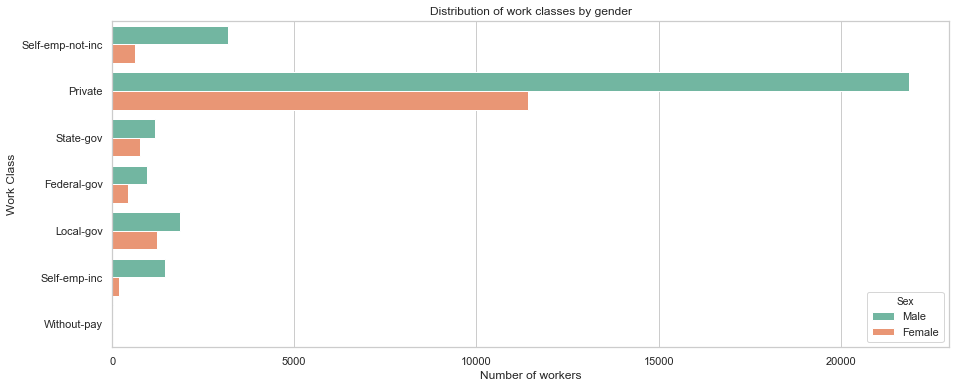

In [169]:
# 1. Get a dataframe only with the columns for workclass and gender
workclass_gender = data[['Workclass', 'Sex']]

chart = sns.countplot(y='Workclass', hue='Sex', data=workclass_gender, palette='Set2')
chart.figure.set_size_inches(15,6)

chart.set_xlabel('Number of workers')
chart.set_ylabel('Work Class')
chart.set_title('Distribution of work classes by gender')


plt.show()


### 2. Investigate the relationship between the level of education and their hours of work per week for females only. Which education level has a larger variety of working hours? Use a visualization technique with appropriate features to show the result.

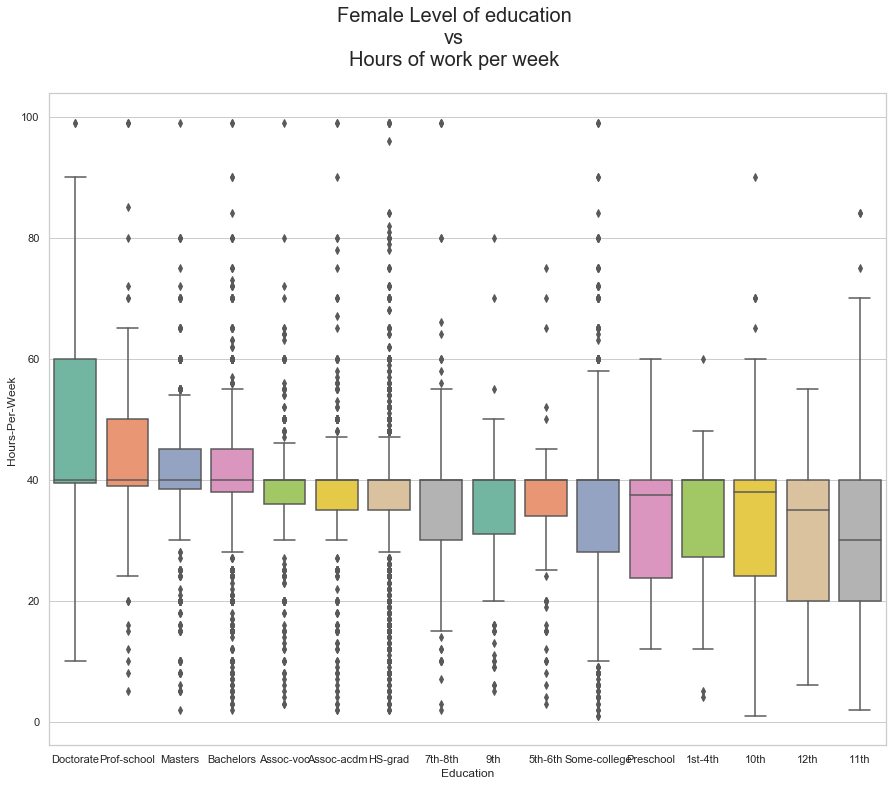

In [186]:
females = data[data["Sex"] == "Female"]
g = females[['Education','Hours-Per-Week']]

# Ordering by variety of hours per week
ranks = g.groupby("Education")["Hours-Per-Week"].mean().fillna(0).sort_values()[::-1].index

chart = sns.boxplot(x='Education', y='Hours-Per-Week', order=ranks, data=g, palette='Set2')
chart.figure.set_size_inches(15,12)
# chart.set_title('Level of education vs Hours of work per week')

fig = plt.gcf()
fig.suptitle('Female Level of education\nvs\nHours of work per week', fontsize=20)

# Doctorate has the larger variety of working hours.


plt.show()


### 3. Use a visualization technique and depict which country has the maximum entry in the dataset.

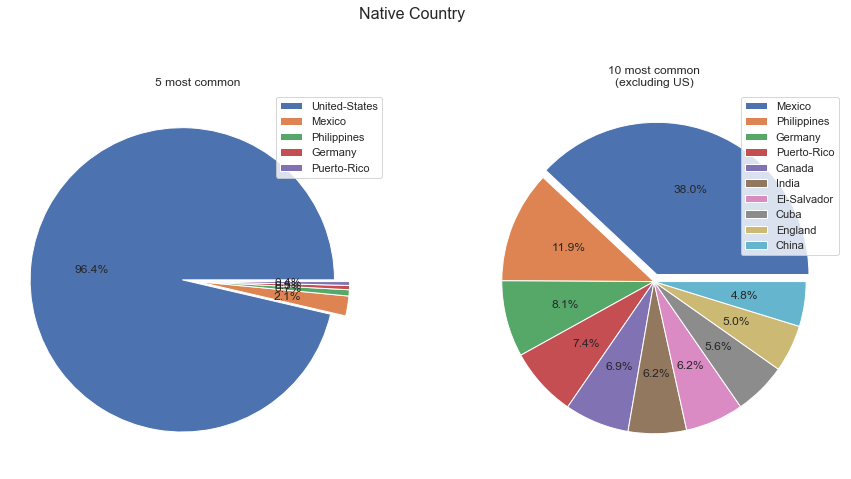

In [177]:
countries = data['Country'].value_counts()

countries_all = countries[:5]
countries_no_us = countries[1:][:10]

fig, axs = plt.subplots(1, 2)

axs[0].pie(countries_all, explode=(0.1,0,0,0,0), autopct='%1.1f%%')
axs[1].pie(countries_no_us, explode=(0.05,0,0,0,0,0,0,0,0,0), autopct='%1.1f%%')

fig.suptitle('Native Country', fontsize=20)

axs[0].set_title("5 most common")
axs[0].legend(countries_all.keys())

axs[1].set_title("10 most common\n(excluding US)")
axs[1].legend(countries_no_us.keys())

fig.set_size_inches(15, 8)



plt.show()

###  4. Repeat the previous analysis but this time exclude the country which has the maximum entry and depict which two countries have the maximum of entries.

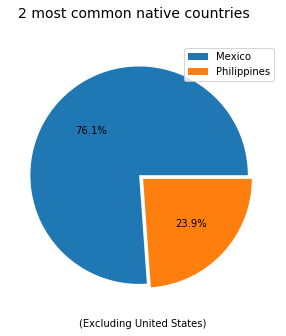

In [19]:
countries = data['Country'].value_counts()
countries_no_us = countries[1:][:2]

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.suptitle('2 most common native countries', fontsize=14)
plt.xlabel("(Excluding United States)")

plt.pie(countries_no_us, explode=(0.05,0), autopct='%1.1f%%')
plt.legend(countries_no_us.keys())


plt.show()


### 5. Investigate the relationship between age and working hours. Use a visualization technique with appropriate features to show the result. Which age interval has higher working hours. Use annotation and show a point that has relatively the maximum working hours.

Max hours: 44.23864734299517
Age: 44.0


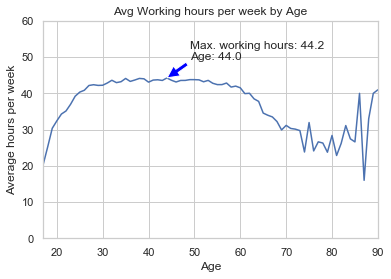

In [183]:
df = data[['Age', 'Hours-Per-Week']]
df = df.groupby('Age')['Hours-Per-Week'].mean()

max_hours = df.max()
age_max_hours = df.loc[df == max_hours].index[0]

print('Max hours:', max_hours)
print('Age:', age_max_hours)

chart = df.plot()
chart.annotate('Max. working hours: ' + str(round(max_hours,1)) + '\nAge: ' + str(age_max_hours), 
                xy=(age_max_hours, max_hours), xytext=(age_max_hours+5, 
                max_hours+5), 
                arrowprops=dict(facecolor='blue', shrink=0.01))
chart.set_ylim(0, 60)

chart.set_xlabel('Age')
chart.set_ylabel('Average hours per week')
chart.set_title('Avg Working hours per week by Age')


plt.show()


### 6. Analysis education levels by using a visualization technique and find out the outliers for this feature of the dataset.

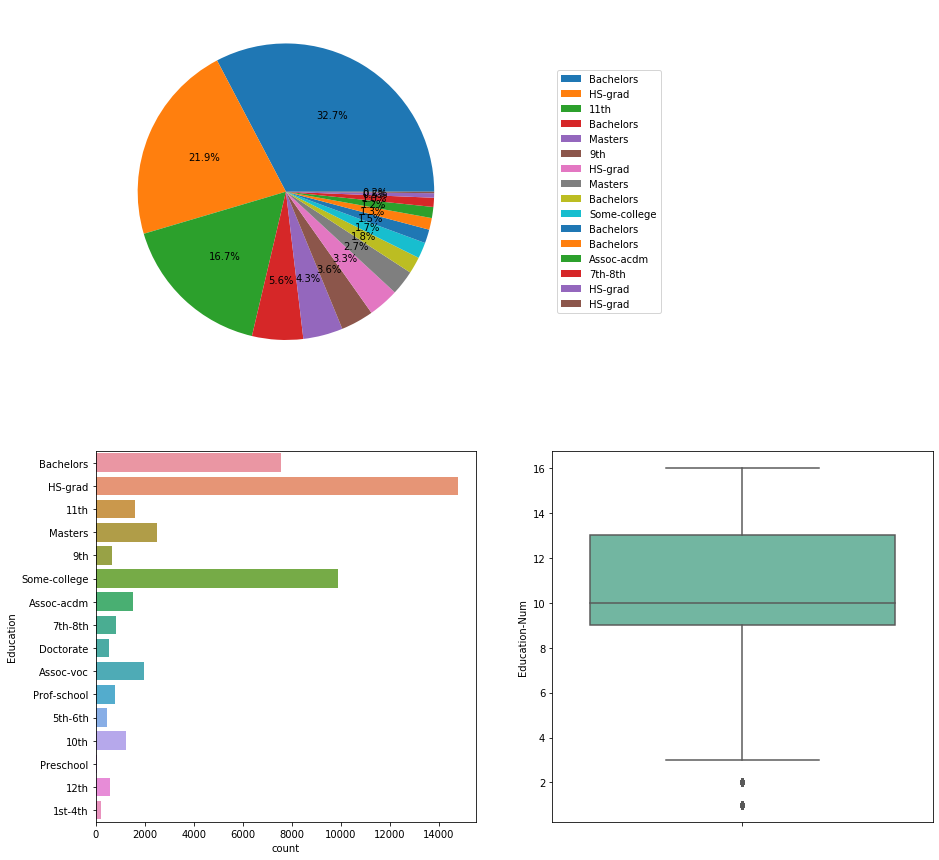

In [21]:
df = data[['Education','Education-Num']].dropna()

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

# Pie
pie = axs[0,0].pie(df['Education'].value_counts(), autopct='%1.1f%%')
axs[0,1].axis("off") 
axs[0,1].legend(pie[0], df['Education'], loc='center left')

# BarPlot
sns.countplot(y='Education', data=df, ax=axs[1,0])

# BoxPlot
sns.boxplot(y="Education-Num", data=df, ax=axs[1,1], palette='Set2')


plt.show()

### 7. The information about income tells whether or not the person makes more than $50,000 per annum. Analysis this information using an appropriate visualization technique to depict how the income for males and females are different for each of the income class (i.e., > 50k and < 50k). See Figure 2 Note that you might need to add more features to this visualization e.g., labels, legend etc..


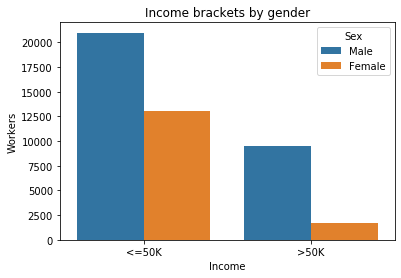

In [24]:

df = data[['Sex', 'Income']]

# Clean up data (e.g. '>50K.' to '>50K')
income = df['Income']
income[income == '>50K.'] = '>50K'
income[income == '<=50K.'] = '<=50K'


chart = sns.countplot(x='Income', hue='Sex', data=df)

plt.title('Income brackets by gender')
plt.xlabel('Income')
plt.ylabel('Workers')


plt.show()


### 8. Analysis the relationship between education and martial status by using an appropriate visualization technique. Depict which martial status has less different types of education

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


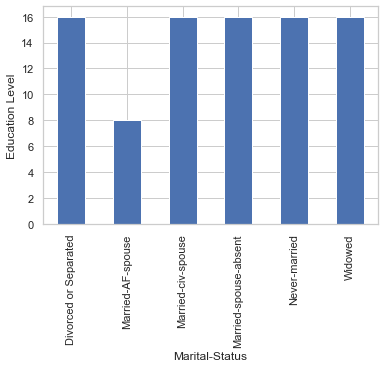

In [187]:

df = data[['Education', 'Marital-Status']]

# Grouping Divorced and Separated together
status = df['Marital-Status']
status[status == 'Divorced'] = 'Divorced or Separated'
status[status == 'Separated'] = 'Divorced or Separated'

# chart = sns.countplot(x='Marital-Status', hue='Education', data=df, palette='Set2')
# chart.figure.set_size_inches(15,7)

status_education = df.groupby(['Marital-Status','Education']).size()
status = status_education.groupby(['Marital-Status']).size()
status.plot(kind='bar')

plt.title('Education vs Marital Status')
plt.ylabel('Education Level')

plt.show()


### 9. Analysis the relationship between occupation and martial status by using an appropriate visualization technique. Depict which occupation has less different types of martial status. See Figure 5. Note that you might need to add more features to this visualization e.g., labels, legend etc...

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


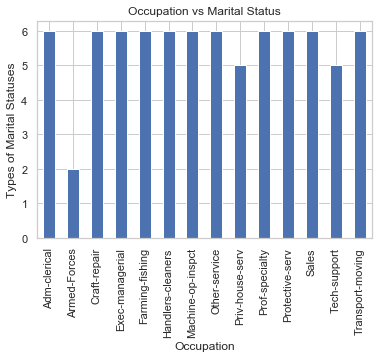

In [189]:

df = data[['Occupation', 'Marital-Status']]

# Grouping Divorced and Separated together
status = df['Marital-Status']
status[status == 'Divorced'] = 'Divorced or Separated'
status[status == 'Separated'] = 'Divorced or Separated'


test = df.groupby(['Marital-Status','Occupation']).size()
test2 = test.groupby(['Occupation']).size()
test2.plot(kind='bar')

plt.title('Occupation vs Marital Status')
plt.ylabel('Types of Marital Statuses')

plt.show()


### 10. Investigate and compare the relationship between people with bachelor degree and people with master degree with respect to their occupation. See Figure 1 Note that you might need to add more features to this visualization e.g., labels, legend etc..

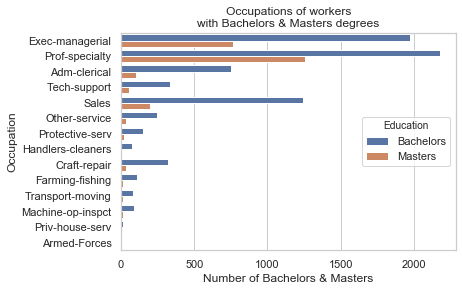

In [190]:

df = data[['Education', 'Occupation']]

education = df['Education']
bachelors_masters = df[education.isin(['Bachelors', 'Masters'])]

sns.countplot(y='Occupation', hue='Education', data=bachelors_masters)

plt.title('Occupations of workers\nwith Bachelors & Masters degrees')
plt.xlabel('Number of Bachelors & Masters')

plt.show()


### 11. Relationship feature in this dataset has a number of different values such as wife, Unmarried and etc. Analysis this feature with respect to the private workclass. Use a visualization technique that can show which relationship has the maximum number of private workclass, which one has the second maximum and so on. See Figure 3 to get an idea on what needs to be done. Note that you might need to add more features to this visualization e.g., labels, legend etc...

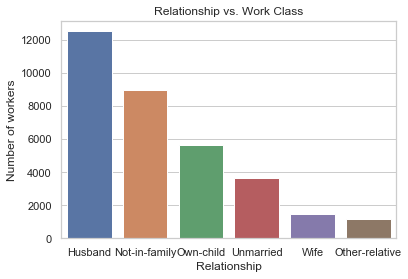

In [191]:

df = data[['Workclass', 'Relationship']]

workclass = df['Workclass']
private = df[workclass == 'Private']

sns.countplot(x='Relationship', data=private, order = private['Relationship'].value_counts().index)

plt.title('Relationship vs. Work Class')
plt.ylabel('Number of workers')

plt.show()


### 12. Analysis marital-status feature by using a visualization technique and find out the outliers for this feature in the dataset.

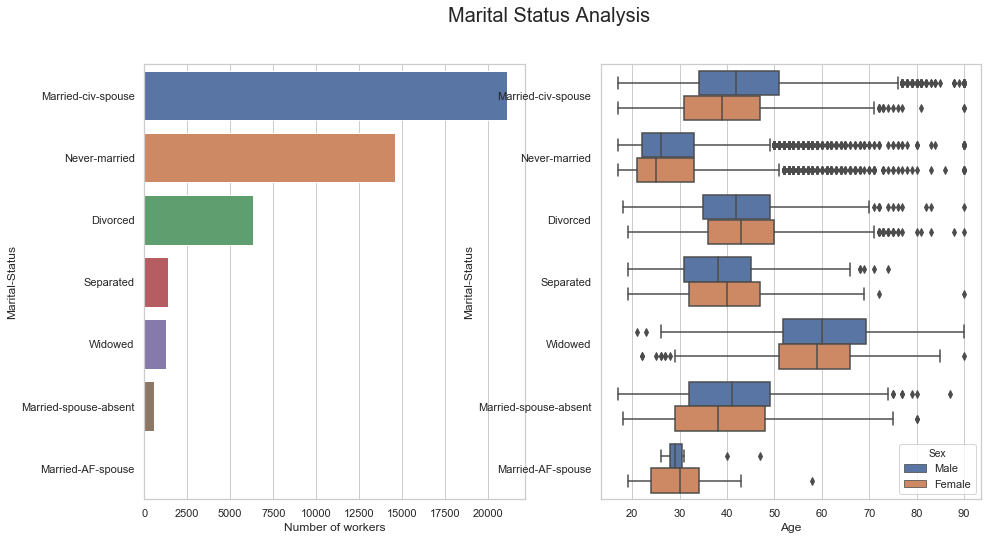

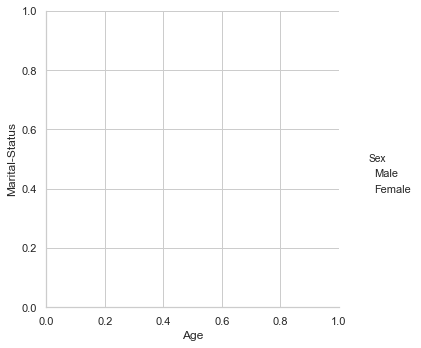

In [252]:
    df = data[['Marital-Status', 'Age', 'Sex']]
    status = df['Marital-Status']
    series = status.value_counts()

    fig, axs = plt.subplots(1, 2)

    sns.countplot(y='Marital-Status', data=df, order=series.index, ax=axs[0])
    axs[0].set_xlabel('Number of workers')

    sns.catplot(x="Age",
                y="Marital-Status",
                hue='Sex',
                kind='box',
                data=df,
                order=series.index,
                ax=axs[1])

    fig.set_size_inches(15, 8)
    fig.suptitle('Marital Status Analysis', fontsize=20)

    fig.canvas.set_window_title('Task 12')
    plt.show()
